In [3]:
# machine learning classification

from sklearn.svm import SVC

from sklearn.metrics import scorer

from sklearn.metrics import accuracy_score

# For data manipulation

import pandas as pd

import numpy as np

# To plot

import matplotlib.pyplot as plt

import seaborn

# To fetch data

from pandas_datareader import data as pdr

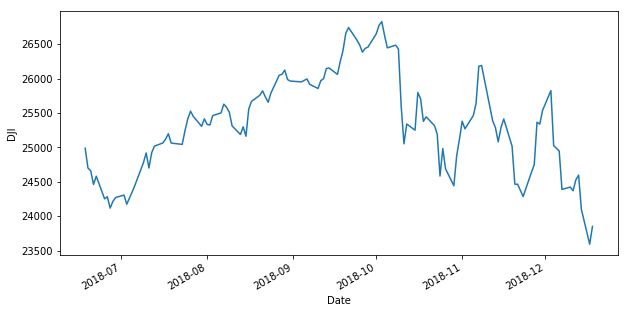

In [4]:
Df = pdr.get_data_yahoo('^DJI', start="2018-06-18", end="2018-12-18")        

Df= Df.dropna()

Df.Close.plot(figsize=(10,5))

plt.ylabel("DJI")

plt.show()

In [5]:
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)


In [6]:
y

array([-1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
        1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1])

In [7]:
Df['Open-Close'] = Df.Open - Df.Close

Df['High-Low'] = Df.High - Df.Low

X=Df[['Open-Close','High-Low']]

In [8]:
X.head()

,Open-Close,High-Low
Date,,
2018-06-18,-43.191406,177.330078
2018-06-19,63.378906,195.839844
2018-06-20,113.369141,176.369141
2018-06-21,177.511719,232.580078
2018-06-22,-53.919922,136.208984


In [9]:
split_percentage = 0.8

split = int(split_percentage*len(Df))

In [10]:
# Train data set

X_train = X[:split]

y_train = y[:split]

In [11]:
# Test data set

X_test = X[split:]

y_test = y[split:]

In [12]:
cls = SVC().fit(X_train, y_train)

In [13]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))

accuracy_test = accuracy_score(y_test, cls.predict(X_test))

In [14]:
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))

print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 100.00%
Test Accuracy: 42.31%


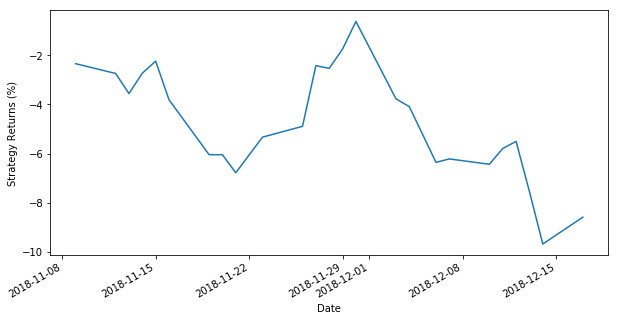

In [15]:
Df['Predicted_Signal'] = cls.predict(X)
# Calculate log returns

Df['Return'] = np.log(Df.Close.shift(-1) / Df.Close)*100

Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))

plt.ylabel("Strategy Returns (%)")

plt.show()

In [16]:
from sklearn.externals import joblib
joblib.dump(cls, 'DJI.pkl')

['DJI.pkl']

In [17]:
https://www.quandl.com/api/v3/datasets/EOD/AAPL.csv?limit=1&api_key=pS4msSe5aUGsLfZwpubq

SyntaxError: invalid syntax (<ipython-input-17-faa3ae37145a>, line 1)